In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/kestrel1311/ros2_ws/src/LieGroup/numpy_version')
from SE3 import se3, SE3
from SO3 import so3, DCM, Euler, MRP, Quat
from SE2 import se2, SE2
from SO2 import so2, SO2

In [35]:
# Test Case Generation
# Xi = [x, y, z, psi, theta, phi]
x0 = np.array([0, 0, 0, 0, 0, 0])
x1 = np.array([1, 1, 1, 0, 0, 0])
x2 = np.array([2, 3, 4, 0, 0, 0])

# se3
xi = se3(x0)
Xi = SE3.exp(xi)
xip1 = se3(x1)
Xip1 = SE3.exp(xip1)
xip2 = se3(x2)
Xip2 = SE3.exp(xip2)

#Xi = SE3(x0)
#Xip1 = SE3(x1)

In [36]:
def find_u_R_d(X0, X1):
    M = X0.inv@X1.to_matrix
    m = SE3.to_vec(M)
    dx = m[0]
    dy = m[1]
    dz = m[2]
    dpsi = m[3]
    dtheta = m[4]
    dphi = m[5]
    
    d = np.sqrt(dx**2+dy**2+dz**2)
    print(dx, dy, dz)
    print(np.sqrt(dy**2+dz**2))
    
    alpha = np.arctan2(dx, np.sqrt(dy**2+dz**2))
    print('alpha', np.rad2deg(alpha))
    
    if np.abs(alpha) > 1e-3:
        R = d/(2*np.sin(alpha))
        u = 2*R*alpha
    else:
        R = np.infty
        u = d
        
    return u, R, d

In [37]:
def local_path_planner(X0, X1, dist):
    # Plot route from start X0 to X1
    u, R, d = find_u_R_d(X0, X1)
    
    if np.abs(u) > dist:
        u = dist*np.sign(u)
    
    # Compute turn angle omega
    if np.isclose(np.abs(R), 0):
        omega = 0
    else:
        omega = u/R
    
    V = SE3(np.array([u, 0, 0, omega, 0, 0]))
    
    return X0.to_matrix@V.to_matrix

In [38]:
Qroute1 = local_path_planner(Xi, Xip1, 20)
Qroute2 = local_path_planner(Xip1, Xip2, 20)

1.0 1.0 1.0
1.4142135623730951
alpha 35.264389682754654
1.0 2.0 3.0
3.605551275463989
alpha 15.501359566936996


2.0 3.0 4.0


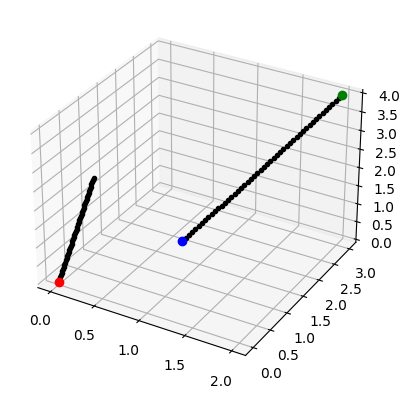

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Route
test_vector = np.linspace(0, 1, 50)
V1 = SE3.to_vec(Xi.inv@Xip1.to_matrix)
v1 = se3(V)

V2 = SE3.to_vec(Xip1.inv@Xip2.to_matrix)
v2 = se3(V2)


for tt in test_vector:
    dominus = se3.vee(v1.wedge)*tt
    manipulus = SE3.exp(se3(np.array(dominus)))
    Q1 = Xi.to_matrix@manipulus.to_matrix
    q = SE3.to_vec(Q1)
    #print(q)
    plt.plot(q[0], q[1], q[2], '.k')
    
    dominus = se3.vee(v2.wedge)*tt
    manipulus = SE3.exp(se3(np.array(dominus)))
    Q2 = Xip1.to_matrix@manipulus.to_matrix
    q = SE3.to_vec(Q2)
    #print(q)
    plt.plot(q[0], q[1], q[2], '.k')
    
print(q[0], q[1], q[2])

# Plot Xi, Xip1
plt.plot(x0[0], x0[1], x0[2], 'or')
plt.plot(x1[0], x1[1], x1[2], 'ob')
plt.plot(x2[0], x2[1], x2[2], 'og')